In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

In [2]:
# Load the data
X, y = load_diabetes(return_X_y=True)

In [3]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train  = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Apply The Algorithms 

- Multiple Linear Regression
- Gradient Descent 
- Regularization
    - Ridge
    - Lasso
    - ElasticNET

In [14]:
# Multiple Linear Regression

class MultipleLinearRegression:

    def __init__(self):

        self.coef_ = None
        self.intercept_ = None
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

        self.coef_ = betas[1:]
        self.intercept_= betas[0]

        print(f"Coef_: {self.coef_}")
        print(f"Intercept_: {self.intercept_}")

    def predict(self, X_test):

        y_pred = np.dot(X_test, self.coef_) + self.intercept_

        return y_pred


In [15]:
mlr = MultipleLinearRegression()

In [16]:
mlr.fit(X_train, y_train)

Coef_: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Intercept_: 153.73654390934848


In [17]:
y_pred_mlr = mlr.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

r2_score_mlr = r2_score(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)

print(f"R2 Score (MLR) : {r2_score_mlr}")
print(f"MSE (MLR) : {mse_mlr}")
print(f"RMSE (MLR) : {rmse_mlr}")

R2 Score (MLR) : 0.4526027629719186
MSE (MLR) : 2900.193628493486
RMSE (MLR) : 53.85344583676597


In [19]:
X_train

array([[ 1.49836523,  1.06136988,  0.21990201, ...,  0.71103773,
         0.54748197, -0.06144896],
       [-0.22885822,  1.06136988, -0.41936607, ...,  1.4842858 ,
        -0.01975653,  0.36723647],
       [ 0.08518241, -0.94217861,  1.01898711, ..., -0.06221033,
         0.3312366 , -0.31866022],
       ...,
       [ 0.63475351, -0.94217861, -0.46502808, ..., -0.83545839,
        -0.25375196, -0.06144896],
       [-0.30736838, -0.94217861, -0.53352109, ..., -0.06221033,
        -0.83072436, -0.83308273],
       [-2.03459183, -0.94217861,  0.56236706, ..., -0.83545839,
        -0.13312789, -0.06144896]])

In [49]:
# Gradient Descent 

class GradientDescent:

    def __init__(self, learning_rate, epochs):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        self.coef_ = np.ones(X_train.shape[1])

        losses = []

        print(f"X_train Initial Stage - {X_train}")

        for i in range(self.epochs):

            y_pred = np.dot(X_train, self.coef_)

            error = y_train - y_pred

            coef_slope = -(2/X_train.shape[0]) * np.dot((error), X_train)
 
            self.coef_ = self.coef_ - (self.lr * coef_slope)

            loss = np.mean(error ** 2)
            losses.append(loss)
            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss}")
        plt.plot(range(self.epochs), losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss over Epochs")
        plt.show()

        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)
        y_pred = np.dot(X_test, self.coef_)

        return y_pred



In [53]:
gradient =  GradientDescent(learning_rate=0.001, epochs=5000)

X_train Initial Stage - [[ 1.          1.49836523  1.06136988 ...  0.71103773  0.54748197
  -0.06144896]
 [ 1.         -0.22885822  1.06136988 ...  1.4842858  -0.01975653
   0.36723647]
 [ 1.          0.08518241 -0.94217861 ... -0.06221033  0.3312366
  -0.31866022]
 ...
 [ 1.          0.63475351 -0.94217861 ... -0.83545839 -0.25375196
  -0.06144896]
 [ 1.         -0.30736838 -0.94217861 ... -0.06221033 -0.83072436
  -0.83308273]
 [ 1.         -2.03459183 -0.94217861 ... -0.83545839 -0.13312789
  -0.06144896]]
Epoch 0, Loss: 29029.06965070155
Epoch 100, Loss: 19695.941217862397
Epoch 200, Loss: 13997.597058737281
Epoch 300, Loss: 10298.706616247124
Epoch 400, Loss: 7847.9045936212515
Epoch 500, Loss: 6213.062280892031
Epoch 600, Loss: 5119.892509504127
Epoch 700, Loss: 4388.1437651898295
Epoch 800, Loss: 3897.999157678982
Epoch 900, Loss: 3569.5042361130454
Epoch 1000, Loss: 3349.224508048479
Epoch 1100, Loss: 3201.4220914020198
Epoch 1200, Loss: 3102.18272366635
Epoch 1300, Loss: 3035.

Epoch 1600, Loss: 2940.0720833694795
Epoch 1700, Loss: 2926.3107862416114
Epoch 1800, Loss: 2916.9912323238036
Epoch 1900, Loss: 2910.660120792724
Epoch 2000, Loss: 2906.341540601255
Epoch 2100, Loss: 2903.379748271939
Epoch 2200, Loss: 2901.333819377795
Epoch 2300, Loss: 2899.907034547549
Epoch 2400, Loss: 2898.899530493511
Epoch 2500, Loss: 2898.1765384800456
Epoch 2600, Loss: 2897.647069511584
Epoch 2700, Loss: 2897.2496032092895
Epoch 2800, Loss: 2896.9424737583677
Epoch 2900, Loss: 2896.69740720255
Epoch 3000, Loss: 2896.495173951887
Epoch 3100, Loss: 2896.32266173931
Epoch 3200, Loss: 2896.1709029996905
Epoch 3300, Loss: 2896.0337439544314
Epoch 3400, Loss: 2895.906945467994
Epoch 3500, Loss: 2895.7875746732147
Epoch 3600, Loss: 2895.6735926058363
Epoch 3700, Loss: 2895.563574124121
Epoch 3800, Loss: 2895.4565172275443
Epoch 3900, Loss: 2895.351712886907
Epoch 4000, Loss: 2895.248655907352
Epoch 4100, Loss: 2895.1469836744423
Epoch 4200, Loss: 2895.0464338935944
Epoch 4300, Loss:

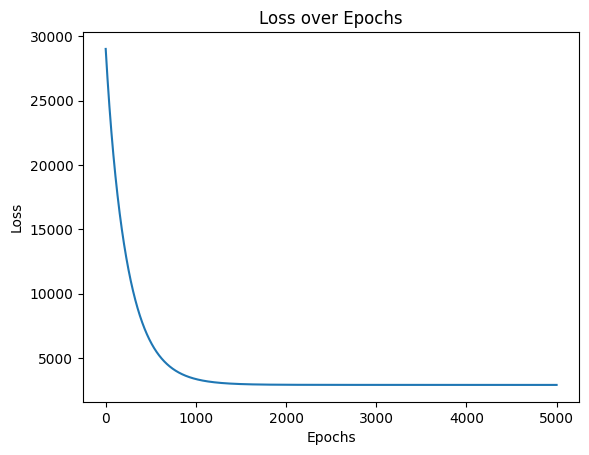

Coef_: [153.72967877   1.94813401 -11.42716333  26.323206    16.58295738
  -6.87271902  -4.66684982  -8.99228086   7.81558781  20.76350668
   2.663527  ]


In [54]:
gradient.fit(X_train, y_train)

In [55]:
y_pred_gradient = gradient.predict(X_test)

r2_score_gradient = r2_score(y_test, y_pred_gradient)
mse_gradient = mean_squared_error(y_test, y_pred_gradient)
rmse_gradient = np.sqrt(mse_gradient)

print(f"R2 Score (Gradient) : {r2_score_gradient}")
print(f"MSE (gradient) : {mse_gradient}")
print(f"RMSE (Gradient) : {rmse_gradient}")

R2 Score (Gradient) : 0.4552883745952343
MSE (gradient) : 2885.964850575579
RMSE (Gradient) : 53.72117692842906


In [56]:
class Ridge:

    def __init__(self, learning_rate, epochs, alpha):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha

    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            coef_slope = np.dot(X_train.T, (np.dot(X_train, self.coef_))) - np.dot(X_train.T, y_train) + np.dot(self.alpha, self.coef_) / X_train.shape[0]

            self.coef_ = self.coef_ - (self.lr * coef_slope)
        
        print(f"Coef_: {self.coef_}")

    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)
        y_pred = np.dot(X_test, self.coef_)

        return y_pred


In [60]:
ridge = Ridge(learning_rate=0.0001, epochs=1000, alpha=0.1)

In [61]:
ridge.fit(X_train, y_train)

Coef_: [153.73642053   1.91568544 -11.44671509  26.18300974  16.64059154
 -14.44140117   1.19828967  -5.59546954   8.95828594  23.66331211
   2.56894321]


In [62]:
y_pred_ridge = ridge.predict(X_test)

In [64]:
r2_score_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f"R2 Score Ridge: {r2_score_ridge:.2f}%")
print(f"MSE Ridge: {mse_ridge}")
print(f"RMSE Ridge : {rmse_ridge}")

R2 Score Ridge: 0.46%
MSE Ridge: 2886.319220554706
RMSE Ridge : 53.7244750607645


In [66]:
# Lasso Regression

class LassoRegression():

    def __init__(self, learning_rate, epochs, alpha):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01
        losses = []

        for i in range(self.epochs):
            
            y_pred = np.dot(X_train, self.coef_)
            error = y_train - y_pred
            coef_slope = np.dot(X_train.T, X_train).dot(self.coef_) - np.dot(X_train.T, y_train) + (np.dot(self.alpha, (np.sign(self.coef_))))
            self.coef_ = self.coef_ - (self.lr * coef_slope)
            loss = np.mean(error ** 2)
            losses.append(loss)
        print(f"Coef_: {self.coef_}")
        plt.plot(range(self.epochs), losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Epoch vs loss")
        plt.show()

    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)
        y_pred = np.dot(X_test, self.coef_)

        return y_pred




In [67]:
lasso = LassoRegression(learning_rate=0.0001, epochs=1000, alpha=0.1)

Coef_: [153.73626062   1.91538793 -11.44605913  26.18318627  16.64022063
 -14.43118724   1.19124193  -5.60040398   8.95512166  23.66010563
   2.56887292]


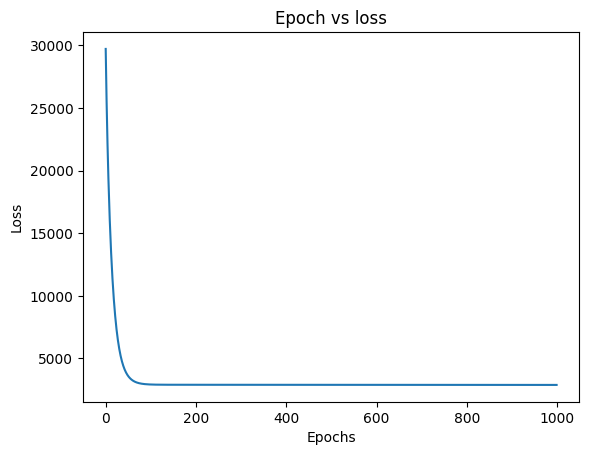

In [68]:
lasso.fit(X_train, y_train)

In [69]:
y_pred_lasso = lasso.predict(X_test)

In [70]:
r2_score_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print(f"R2 Score lasso : {r2_score_lasso:.2f}%")
print(f"MSE Lasso : {mse_lasso}")
print(f"RMSE Lasso : {rmse_lasso}")


R2 Score lasso : 0.46%
MSE Lasso : 2886.297859806256
RMSE Lasso : 53.72427626135373


In [71]:
# ElasticNET Regularization

class ElasticNET_:

    def __init__(self, learning_rate, epochs, alpha, l2_ratio):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.l2_ratio = l2_ratio
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            coef_slope = np.dot(X_train.T, X_train).dot(self.coef_) - np.dot(X_train.T, y_train) + np.dot(self.alpha, (np.dot(self.l2_ratio, self.coef_) + np.dot((1 - self.l2_ratio), np.sign(self.coef_))))

            self.coef_ = self.coef_ - (self.lr * coef_slope)
        
        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)
        y_pred = np.dot(X_test, self.coef_)

        return y_pred

In [72]:
elastic_ = ElasticNET_(learning_rate=0.0001, epochs=1000, alpha=0.1, l2_ratio=0.5)

In [73]:
elastic_.fit(X_train, y_train)

Coef_: [153.71462966   1.91563178 -11.44420784  26.18023905  16.6386257
 -14.42244161   1.18685145  -5.60366202   8.95335205  23.65480177
   2.5708132 ]


In [74]:
y_pred_elastic = elastic_.predict(X_test)

In [76]:
r2_score_elastic = r2_score(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)

print(f"R2 Score Elastic : {r2_score_elastic:.2f}%")
print(f"MSE Elastic : {mse_elastic}")
print(f"RMSE Elastic : {rmse_elastic}")

R2 Score Elastic : 0.46%
MSE Elastic : 2886.42402422433
RMSE Elastic : 53.72545043295896
